# Import Libraries

In [1]:
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict

from itertools import cycle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from yellowbrick import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import tree
#import pydotplus
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
#from scikitplot.metrics import plot_roc

from sklearn.preprocessing import OneHotEncoder, LabelEncoder




In [2]:
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer

from scipy.stats import uniform, randint

from sklearn.neural_network import MLPClassifier

In [3]:
# Neural Networks
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier, MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import L1, L2
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Dropout
from keras.regularizers import l2, l1

# Prep Data

In [4]:
#df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_SenzaOutlier.csv') 
df = pd.read_csv(r'Data/Processed/final_df_standard_scaler_box_cox.csv') 
df.shape

(88554, 24)

In [5]:
categoriche_da_trasformare = [ 'explicit', 'genre']

# Applica il LabelEncoder a ciascuna colonna categorica
label_encoder = LabelEncoder()
for col in categoriche_da_trasformare:
    df[col] = label_encoder.fit_transform(df[col])



In [6]:
pd.set_option('display.max_column', None)


In [7]:
df = df.drop(columns=['Unnamed: 0', 'valence', 'energy'])

In [8]:
df.head()

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,-0.680781,0.162759,1.978201,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,-0.618882,0.433548,0.564559,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,39,Sad
1,0.940114,0.812539,-1.691805,0.208828,-0.452776,0.240034,-0.532243,-0.511836,1.878636,-1.384628,-1.058807,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,17,Angry
2,2.862979,-1.461689,0.695703,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,-0.081356,1.276279,0.545517,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,73,Angry
3,-0.386216,1.415905,0.655625,0.954063,0.919465,-0.792551,-0.532243,-0.689672,1.324332,-1.142426,0.564559,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,51,Happy
4,1.023124,-0.533433,-0.260445,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,0.254670,0.579533,0.564559,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,73,Sad


In [9]:
from sklearn.preprocessing import LabelEncoder

# Inizializza il LabelEncoder
label_encoder = LabelEncoder()

# Codifica le etichette di emozione nel DataFrame
df['mood'] = label_encoder.fit_transform(df['mood'])
df

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,-0.680781,0.162759,1.978201,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,-0.618882,0.433548,0.564559,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,39,3
1,0.940114,0.812539,-1.691805,0.208828,-0.452776,0.240034,-0.532243,-0.511836,1.878636,-1.384628,-1.058807,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,17,0
2,2.862979,-1.461689,0.695703,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,-0.081356,1.276279,0.545517,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,73,0
3,-0.386216,1.415905,0.655625,0.954063,0.919465,-0.792551,-0.532243,-0.689672,1.324332,-1.142426,0.564559,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,51,1
4,1.023124,-0.533433,-0.260445,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,0.254670,0.579533,0.564559,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,0.962328,1.508731,1.153738,-0.590779,-0.490347,1.107203,-0.527803,-0.305649,-0.081524,0.957767,0.564559,0.055934,0.200625,0.852280,-0.113375,0,7,0,4,81,2
88550,-1.191927,-0.022892,-0.203191,-4.644748,-0.255080,1.992191,2.445458,-0.642765,-1.338099,-0.800688,0.531235,1.504464,2.688329,-1.033161,-0.306613,0,10,1,4,26,2
88551,0.316970,1.508731,-0.810087,-0.199843,-0.447409,1.196296,-0.532243,-0.573692,0.275053,-0.588346,-0.282828,-0.383871,0.123742,0.824139,-0.130130,0,3,1,4,70,3
88552,0.054432,1.323080,0.483862,-0.584153,-0.425045,-0.169793,2.361622,-0.612868,0.087331,1.694327,0.064696,0.011550,-1.523744,0.205039,-0.301417,0,10,0,4,32,0


In [10]:

# Costruisci il mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Stampa il mapping
print("Mapping delle emozioni:")
for mood, code in mapping.items():
    print(f"{mood}: {code}")

# Decodifica un esempio
decoded_code = 1  # Esempio di codice da decodificare
decoded_mood = label_encoder.inverse_transform([decoded_code])[0]
print(f"\nDecodificato il codice {decoded_code}: {decoded_mood}")


Mapping delle emozioni:
Angry: 0
Happy: 1
Relaxed: 2
Sad: 3

Decodificato il codice 1: Happy


In [11]:
mapping

{'Angry': 0, 'Happy': 1, 'Relaxed': 2, 'Sad': 3}

In [12]:
df['mood'].value_counts()

mood
1    32908
0    29932
3    18518
2     7196
Name: count, dtype: int64

# Split Data

In [13]:
attributes = [col for col in df.columns if col != "mood"]

X = df[attributes].values
y = np.array(df["mood"])  

X.shape, y.shape

((88554, 20), (88554,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70843, 20), (17711, 20), (70843,), (17711,))

In [15]:
pd.Series(y_train).value_counts()


1    26326
0    23946
3    14814
2     5757
Name: count, dtype: int64

In [16]:
pd.Series(y_test).value_counts()

1    6582
0    5986
3    3704
2    1439
Name: count, dtype: int64

# 1- PERCEPTRON

In [40]:
from sklearn.linear_model import Perceptron

In [41]:
#run in 107 min minuti

perceptron = Perceptron()

param_list = {'alpha': [0.0001, 0.001, 0.01, 0.1],
            'max_iter': [50, 100, 500, 1000, 2000, 5000],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1], # Tolleranza per i criteri di arresto
            'penalty': [None, 'l2', 'l1', 'elasticnet'],
            'class_weight': [None, 'balanced'],  # Pesi delle classi
            'eta0': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}  # Learning rate


grid_search = GridSearchCV(perceptron, param_grid = param_list , cv=5, scoring='accuracy',  n_jobs=-1)


grid_search.fit(X_train, y_train)
grid_search.best_params_

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.1

{'alpha': 0.0001,
 'class_weight': None,
 'eta0': 0.1,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'tol': 0.1}

In [42]:
ppn = grid_search.best_estimator_
ppn.fit(X_train, y_train)

y_pred_ppn = ppn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_ppn))
print('F1-score %s' % f1_score(y_test, y_pred_ppn, average='weighted'))
print(classification_report(y_test, y_pred_ppn, target_names=mapping))

Accuracy 0.5726384732652025
F1-score 0.554454681144869
              precision    recall  f1-score   support

       Angry       0.62      0.34      0.44      5986
       Happy       0.51      0.82      0.63      6582
     Relaxed       0.45      0.25      0.32      1439
         Sad       0.79      0.62      0.69      3704

    accuracy                           0.57     17711
   macro avg       0.59      0.51      0.52     17711
weighted avg       0.60      0.57      0.55     17711



In [43]:
ppn

Perceptron(eta0=0.1, max_iter=100, penalty='elasticnet', tol=0.1)

In [44]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, ppn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_ppn)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.5795491438815409
Accuratezza sul set di test: 0.5726384732652025


# MLP 

 Ecco i principali valori di default per MLPClassifier in Scikit-Learn:

- hidden_layer_sizes: (100,) # Numero di neuroni nei livelli nascosti. Il default è una singola hidden layer con 100 neuroni.
- activation: 'relu'. Funzione di attivazione per i livelli nascosti. Opzioni: 'identity', 'logistic', 'tanh', 'relu'.
- solver: 'adam'.Algoritmo per l'ottimizzazione del peso. Opzioni: 'lbfgs', 'sgd', 'adam'.
- alpha: 0.0001. Parametro di regolarizzazione L2 (penalty term).
- batch_size: 'auto'. Dimensione dei mini-batch per l'addestramento. Il valore predefinito 'auto' corrisponde a min(200, n_samples).
- learning_rate: 'constant'. Programma di adattamento del learning rate. Opzioni: 'constant', 'invscaling', 'adaptive'.
- max_iter: 200. Numero massimo di epoche (iterazioni) per l'addestramento.
- tol: 0.0001. Tolleranza per la miglioramento della funzione obiettivo. Se il miglioramento è inferiore a questa soglia, l'addestramento si ferma.
- momentum: 0.9. Momento utilizzato per il gradient descent (solo per solver 'sgd').


In [45]:
#prova con solo valori di default - 1 minuto

mlp = MLPClassifier()

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=mapping))


Accuracy 0.6812715261701767
F1-score 0.6760801475882451
              precision    recall  f1-score   support

       Angry       0.73      0.57      0.64      5986
       Happy       0.64      0.80      0.71      6582
     Relaxed       0.55      0.41      0.47      1439
         Sad       0.75      0.75      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.67      0.63      0.64     17711
weighted avg       0.69      0.68      0.68     17711



/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.7033722456700027
Accuratezza sul set di test: 0.6812715261701767


prova 1 layer

In [47]:
# RUN in 19 min 
param_dist = {
    'hidden_layer_sizes':  [(16,), (32,), (64,), (100,), (128,)],
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'solver': ['sgd', 'adam'],
    'batch_size': [16,32,64],
    'momentum': [0.1,0.5,0.9],
    'learning_rate': ['constant','adaptive'] ,
    'alpha': [0.001,0.01,0.1,0.2]
}

# max_iter: default 200. Numero massimo di epoche (iterazioni) per l'addestramento.

rs = RandomizedSearchCV(MLPClassifier(), param_dist, scoring='accuracy', n_iter=10, cv=5, random_state=0, n_jobs = -1)
rs.fit(X_train, y_train)

print("Best parameters: ", rs.best_params_)
print("Best score: ", rs.best_score_)

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-pa

Best parameters:  {'solver': 'adam', 'momentum': 0.5, 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'batch_size': 32, 'alpha': 0.01, 'activation': 'relu'}
Best score:  0.683709038217733


In [48]:
#alleno il modello con i migliori parametri
mlp1 = rs.best_estimator_
mlp1.fit(X_train, y_train)

y_pred_mlp1 = mlp1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_mlp1))
print('F1-score %s' % f1_score(y_test, y_pred_mlp1, average='weighted'))
print(classification_report(y_test, y_pred_mlp1, target_names=mapping))

Accuracy 0.6802552086274067
F1-score 0.6760734553966138
              precision    recall  f1-score   support

       Angry       0.71      0.60      0.65      5986
       Happy       0.67      0.74      0.70      6582
     Relaxed       0.53      0.41      0.46      1439
         Sad       0.69      0.81      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.65      0.64      0.64     17711
weighted avg       0.68      0.68      0.68     17711



In [49]:
#Calcola l'accuratezza e altre metriche di valutazione del modello sia sui dati di addestramento che sui dati di test.

train_accuracy = accuracy_score(y_train, mlp1.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_mlp1)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)


Accuratezza sul set di addestramento: 0.6888330533715399
Accuratezza sul set di test: 0.6802552086274067


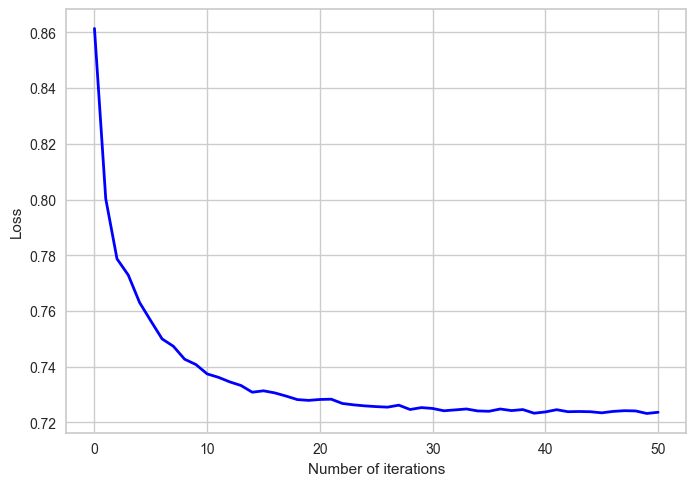

In [50]:
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
#plt.title('Loss Curve for MLP Model with 3 hidden layers ')
plt.plot(mlp1.loss_curve_, color='blue', linestyle='-', linewidth=2)
plt.show()


# KERAS


In [17]:
import keras
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras

## **Hyper-parameter tuning**

### Splitting Train in Train1 e Val

In [18]:
#uso train e validation per il modello
x_train1, x_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
def build_model(meta, hidden_layer_sizes, activation, optimizer, momentum=None):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()   ##sequential
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    
    if optimizer.__class__.__name__ == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=0.01, momentum=momentum)
    else:
        opt = optimizer
    
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    return model

nn = KerasClassifier(
    model=build_model,
    verbose=False)

params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1],
    'model__hidden_layer_sizes': [(32,), (64,), (128,),  # Configurazioni a un livello
                                (32, 16), (64, 32), (128, 64),   # Configurazioni a due livelli
                                (64, 16), (128, 32),   # Altre configurazioni a due livelli
                                (128, 64, 32)],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': [keras.optimizers.Adam(), keras.optimizers.SGD()],
    'model__momentum' : [0.1, 0.3, 0.5, 0.9],  #verifica
    'epochs': [10, 50, 100, 200],
    'batch_size': [32,64,128],
}

rs_keras = RandomizedSearchCV(nn, params, scoring='accuracy', verbose=True, n_iter=10, cv=3, n_jobs= -1)



In [23]:
# grid search for TRAIN 1 -> run 27 min 

rs_keras.fit(x_train1, y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function build_model at 0x2931ebce0>, verbose=False),
                   n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'epochs': [10, 50, 100, 200],
                                        'model__activation': ['relu', 'tanh'],
                                        'model__hidden_layer_sizes': [(32,),
                                                                      (64,),
                                                                      (128,),
                                                                      (32, 16),
                                                                      (64, 32),
                                                                      (128, 64),
                                                                      (64, 16),
                                                                      (128, 32),
                                                                      (128, 64,
                                                                       32)],
                                        'model__momentum': [0.1, 0.3, 0.5, 0.9],
                                        'model__optimizer': [<keras.src.optimizers.adam.Adam object at 0x290467a50>,
                                                             <keras.src.optimizers.sgd.SGD object at 0x293238d10>],
                                        'optimizer__learning_rate': [0.001,
                                                                     0.01,
                                                                     0.1]},
                   scoring='accuracy', verbose=True)

In [24]:
print(rs_keras.best_score_, rs_keras.best_params_)

0.6811941760947301 {'optimizer__learning_rate': 0.001, 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x290467a50>, 'model__momentum': 0.3, 'model__hidden_layer_sizes': (64, 16), 'model__activation': 'tanh', 'epochs': 200, 'batch_size': 128}


In [25]:
y_pred = rs_keras.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred, target_names=  mapping))

Accuracy 0.6844334029699057
F1-score 0.679967406546189
              precision    recall  f1-score   support

       Angry       0.72      0.61      0.66      5986
       Happy       0.65      0.77      0.71      6582
     Relaxed       0.54      0.39      0.45      1439
         Sad       0.74      0.77      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.66      0.63      0.64     17711
weighted avg       0.68      0.68      0.68     17711



In [31]:
# Grid search results:

# 'optimizer__learning_rate': 0.001,
# 'model__optimizer': 'Adam',
# 'model__momentum': 0.3,
# 'model__hidden_layer_sizes': (64, 16), 
# 'model__activation': 'tanh', 
# 'epochs': 200, 
# 'batch_size': 128



# Best model resulted from grid search

def build_model_opt(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='tanh')) # 
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_classes, activation='softmax')) # output layer

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [32]:
# prendo  optimizer__learning_rate ed epoche da sopra

opt = 0.01
ep = 200

nn_opt = KerasClassifier(
    model=build_model_opt(opt),
    loss="sparse_categorical_crossentropy",
    epochs=ep,
    verbose=False
)

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# 4 min -> TRAIN with validation using best params from previous grid search
nn_opt.fit(x_train1, y_train1, validation_data=(x_val, y_val))

KerasClassifier(
	model=<Sequential name=sequential_1, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=False
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)

In [34]:
nn_opt.model_.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,358 (28.75 KB)

 Trainable params: 2,452 (9.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,906 (19.17 KB)

In [35]:
history = nn_opt.history_
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

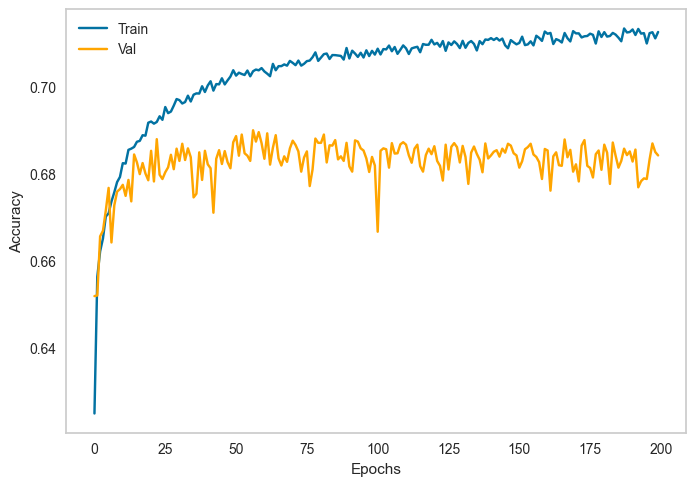

In [36]:
plt.plot(history['accuracy'], label='Train', color='b')
plt.plot(history['val_accuracy'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.legend()
plt.show()

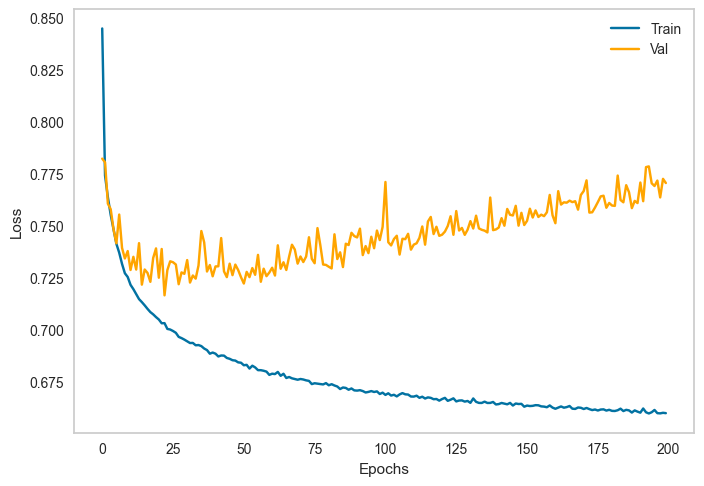

In [37]:
plt.plot(history['loss'], label='Train', color='b')
plt.plot(history['val_loss'], label='Val', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.legend()
plt.show()


### Final Retraining

In [99]:
# prendo  optimizer__learning_rate ed epoche da sopra

opt = 0.01
ep = 40

nn_opt_final = KerasClassifier(
    model=build_model_opt(opt),
    loss="sparse_categorical_crossentropy",
    epochs=ep,
    verbose=True
)

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
# 4 min -> Final RETRAINING
nn_opt_final.fit(X_train, y_train)

Epoch 1/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - accuracy: 0.5876 - loss: 0.9100
Epoch 2/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step - accuracy: 0.6532 - loss: 0.7733
Epoch 3/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 669us/step - accuracy: 0.6645 - loss: 0.7561
Epoch 4/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - accuracy: 0.6659 - loss: 0.7486
Epoch 5/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.6702 - loss: 0.7413
Epoch 6/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step - accuracy: 0.6757 - loss: 0.7335
Epoch 7/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.6763 - loss: 0.7306
Epoch 8/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.6805 - loss: 0.7252
Epoch 9/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.6816 - loss: 0.7184
Epoch 10/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step - accuracy: 0.6829 - loss: 0.7176
Epoch 11/40
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.6854 - loss: 0.7116
Epoch 12

KerasClassifier(
	model=<Sequential name=sequential_10, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=True
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=40
	class_weight=None
)

### Performance on TEST SET

In [101]:
y_pred_opt = nn_opt_final.predict(X_test).astype(int)

554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step


In [102]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_opt))
print('F1-score %s' % f1_score(y_test, y_pred_opt, average='weighted'))
print(classification_report(y_test, y_pred_opt, target_names = mapping))

Accuracy 0.6812150640844673
F1-score 0.6792882260552292
              precision    recall  f1-score   support

       Angry       0.66      0.69      0.68      5986
       Happy       0.67      0.71      0.69      6582
     Relaxed       0.54      0.40      0.46      1439
         Sad       0.77      0.73      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.66      0.63      0.64     17711
weighted avg       0.68      0.68      0.68     17711



554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


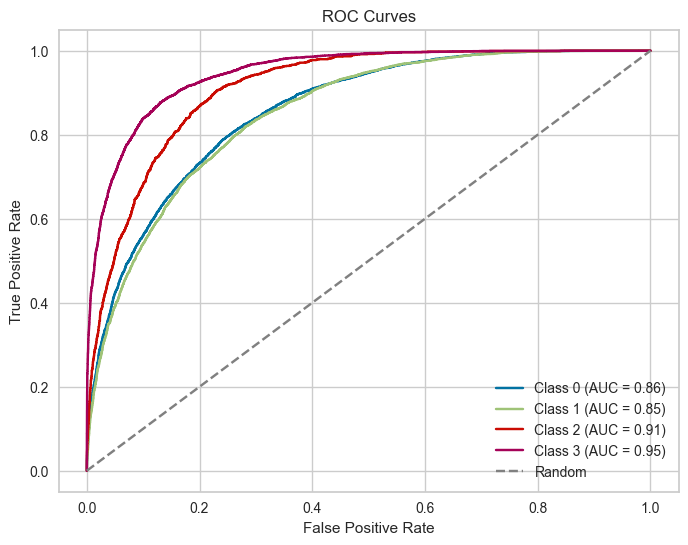

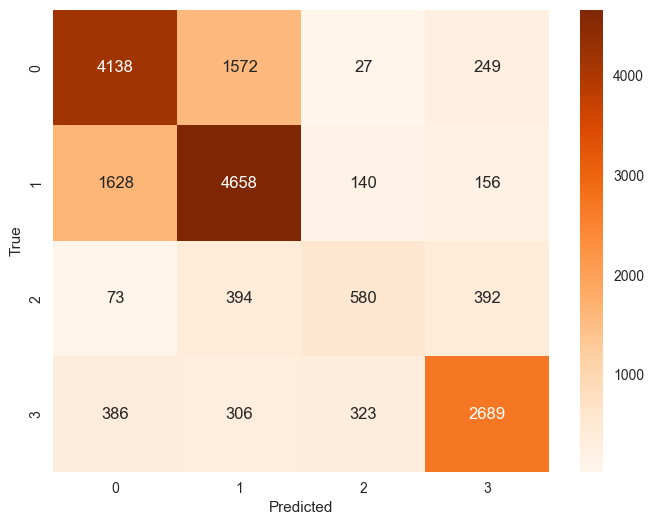

In [103]:
# Assuming `y_test` is your true labels and `y_pred_opt` is your predicted labels
n_classes = 4

y_probs_opt = nn_opt_final.predict_proba(X_test)
y_test_binary = np.eye(n_classes)[y_test]

# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_probs_opt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Confusion Matrix
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, cmap="Oranges", fmt="d", xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Confusion Matrix')
plt.show()

## Early Stopping

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
#'best_model_NOREG.h5 è il nome arbitrario del file senza regolazione con estensione h5


es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=True) #questi valori, soprattutto della patience può essere cambiato
mc = ModelCheckpoint('Output_Saved/Advanced_Class&Reg/best_model_NOREG.keras', monitor='val_accuracy', save_best_only=True)

nn_es = KerasClassifier(model=build_model_opt(0.01), callbacks=[es, mc])


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
nn_es.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.5829 - loss: 0.9232 - val_accuracy: 0.6465 - val_loss: 0.7940
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.6573 - loss: 0.7755 - val_accuracy: 0.6562 - val_loss: 0.7747
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.6609 - loss: 0.7631 - val_accuracy: 0.6623 - val_loss: 0.7639
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.6621 - loss: 0.7578 - val_accuracy: 0.6684 - val_loss: 0.7549
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.6648 - loss: 0.7502 - val_accuracy: 0.6600 - val_loss: 0.7645
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.6648 - loss: 0.7520 - val_accuracy: 0.6768 - val_loss: 0.7505
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.6745 - loss: 0.7314 - val_accuracy: 0.6694 - val_loss: 0.7435
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step - accuracy: 

KerasClassifier(
	model=<Sequential name=sequential_2, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x299c02f50>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x29c0d1850>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

### Final Retraining

In [104]:
nn_es_final = nn_es.fit(X_train, y_train, epochs=50)

Epoch 1/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - accuracy: 0.7018 - loss: 0.6858
Epoch 2/50
 215/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7093 - loss: 0.6554

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step - accuracy: 0.7021 - loss: 0.6804
Epoch 3/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 703us/step - accuracy: 0.7011 - loss: 0.6855
Epoch 4/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step - accuracy: 0.7057 - loss: 0.6828
Epoch 5/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step - accuracy: 0.7014 - loss: 0.6819
Epoch 6/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - accuracy: 0.7052 - loss: 0.6785
Epoch 7/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - accuracy: 0.7050 - loss: 0.6832
Epoch 8/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - accuracy: 0.7050 - loss: 0.6789
Epoch 9/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step - accuracy: 0.7070 - loss: 0.6751
Epoch 10/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step - accuracy: 0.6998 - loss: 0.6841
Epoch 11/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - accuracy: 0.7054 - loss: 0.6786
Epoch 12/50
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.7056 - loss: 0.6765
Epoch 13/50
2214/2

### Performance on TEST SET

In [105]:
y_pred_es = nn_es_final.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_es))
print('F1-score %s' % f1_score(y_test, y_pred_es, average='weighted'))
print(classification_report(y_test, y_pred_es, target_names = mapping))

#patience 10 epochs: Accuracy 0.46474358974358976
#patience 20 epoche: Accuracy 0.4519230769230769


554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy 0.6807633673987917
F1-score 0.6776322905381897
              precision    recall  f1-score   support

       Angry       0.68      0.64      0.66      5986
       Happy       0.67      0.72      0.70      6582
     Relaxed       0.55      0.41      0.47      1439
         Sad       0.73      0.77      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.66      0.64      0.64     17711
weighted avg       0.68      0.68      0.68     17711



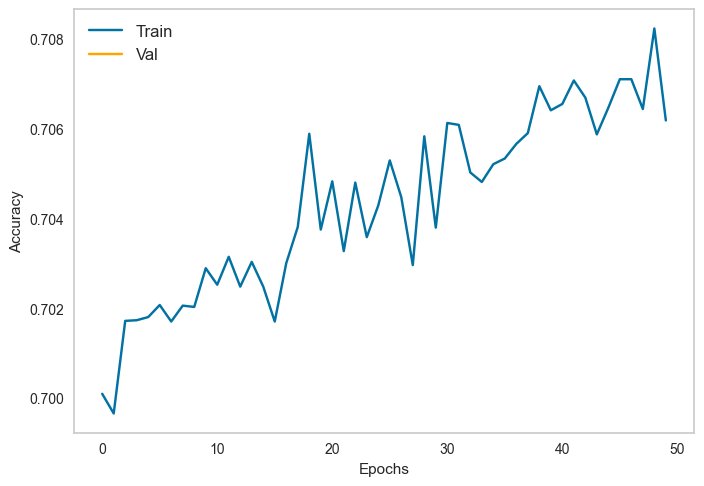

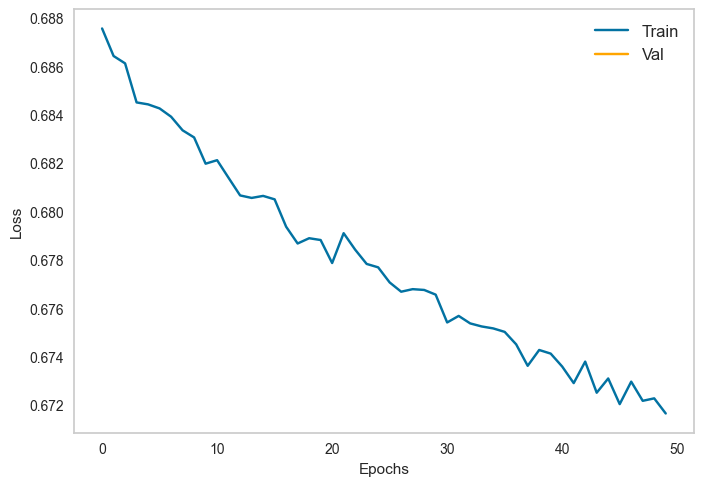

In [106]:
# #con patience 20 epoche
history_es = nn_es.history_

# plt.figure(figsize=(12, 8))

plt.plot(history_es['accuracy'], label='Train')
plt.plot(history_es['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_es['loss'], label='Train')
plt.plot(history_es['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

## L2 Regularization

metto parametro di regolaizone ed epoche rilevate prima
poi scelgo L2 Regularization:

- Un valore comune per iniziare è 𝜆=0.01. Questo valore fornisce una penalizzazione moderata e può essere un buon punto di partenza.
- Utilizza una griglia di ricerca per esplorare vari valori di λ. Ad esempio, puoi provare valori come 0.0001, 0.001, 0.01, 0.1

In [49]:
from keras.regularizers import l2, l1

In [81]:

def build_L2_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='tanh', kernel_regularizer=l2(0.001))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [110]:
#Modello NN con L2 + early stopping
mc = ModelCheckpoint('Output_Saved/Advanced_Class&Reg/best_model_L2.keras', monitor='val_accuracy', save_best_only=True)
#                   best_model_L2.keras

nn_L2 = KerasClassifier(model=build_L2_model(0.01), callbacks=[es,mc])  #qui inserisco anche early stopping definito prima

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
nn_L2 = nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5609 - loss: 1.0720 - val_accuracy: 0.6487 - val_loss: 0.8225
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.6503 - loss: 0.8209 - val_accuracy: 0.6430 - val_loss: 0.8220
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.6510 - loss: 0.8085 - val_accuracy: 0.6386 - val_loss: 0.8468
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.6514 - loss: 0.8077 - val_accuracy: 0.6590 - val_loss: 0.7920
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6530 - loss: 0.8004 - val_accuracy: 0.6617 - val_loss: 0.7869
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.6571 - loss: 0.7941 - val_accuracy: 0.6551 - val_loss: 0.7974
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.6595 - loss: 0.7897 - val_accuracy: 0.6591 - val_loss: 0.7907
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.65

### Final Retraining

In [112]:
nn_L2_final = nn_L2.fit(X_train, y_train, epochs=46)

Epoch 1/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step - accuracy: 0.6671 - loss: 0.7724
Epoch 2/200
 234/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.6650 - loss: 0.7622

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.6647 - loss: 0.7726
Epoch 3/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.6655 - loss: 0.7746
Epoch 4/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.6641 - loss: 0.7766
Epoch 5/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - accuracy: 0.6619 - loss: 0.7802
Epoch 6/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6649 - loss: 0.7747
Epoch 7/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step - accuracy: 0.6633 - loss: 0.7743
Epoch 8/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 723us/step - accuracy: 0.6660 - loss: 0.7748
Epoch 9/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6627 - loss: 0.7768  
Epoch 10/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.6644 - loss: 0.7729
Epoch 11/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.6636 - loss: 0.7756
Epoch 12/200
2214/2214 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.6683 - loss: 0.7679
Epoch 13/2

### Performance on TEST SET

In [ ]:
y_pred_L2 = nn_L2_final.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average='weighted'))
print(classification_report(y_test, y_pred_L2, target_names=mapping))

554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
Accuracy 0.6608322511433572
F1-score 0.6539467957153452
              precision    recall  f1-score   support

       Angry       0.68      0.61      0.64      5986
       Happy       0.63      0.73      0.68      6582
     Relaxed       0.56      0.28      0.37      1439
         Sad       0.73      0.75      0.74      3704

    accuracy                           0.66     17711
   macro avg       0.65      0.60      0.61     17711
weighted avg       0.66      0.66      0.65     17711



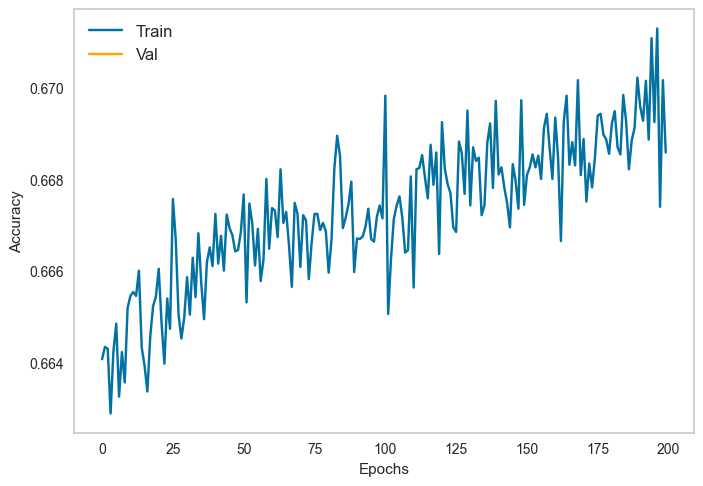

In [113]:
history = nn_L2.history_

# plt.figure(figsize=(12, 8))

plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()


In [87]:
#Provo con altri valori del kernel (sopra è 0.001, qui sarà 0.005)

n_classes = 4

def build_L2_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    #h_dim = 64
    model = Sequential()
    model.add(Dense(64, input_dim=n_feature, activation='tanh', kernel_regularizer=l2(0.005))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [88]:
#Modello NN con early stopping + L2
mc = ModelCheckpoint('Output_Saved/Advanced_Class&Reg/best_model_L2.keras', monitor='val_accuracy', save_best_only=True)

nn_L2 = KerasClassifier(model=build_L2_model(0.01), callbacks=[es,mc])

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - accuracy: 0.5654 - loss: 1.0260 - val_accuracy: 0.6559 - val_loss: 0.8159
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.6513 - loss: 0.8197 - val_accuracy: 0.6445 - val_loss: 0.8244
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.6510 - loss: 0.8105 - val_accuracy: 0.6588 - val_loss: 0.7940
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.6534 - loss: 0.8019 - val_accuracy: 0.6560 - val_loss: 0.8060
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.6514 - loss: 0.8032 - val_accuracy: 0.6550 - val_loss: 0.8006
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6535 - loss: 0.7985 - val_accuracy: 0.6609 - val_loss: 0.7963
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.6596 - loss: 0.7916 - val_accuracy: 0.6608 - val_loss: 0.7916
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.

KerasClassifier(
	model=<Sequential name=sequential_8, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x299c02f50>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x15a77b750>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [90]:
y_pred_L2 = nn_L2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average='weighted'))
print(classification_report(y_test, y_pred_L2)) #rispetto a 47,23?? peggio

554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy 0.647902433515894
F1-score 0.6425075474331543
              precision    recall  f1-score   support

           0       0.73      0.49      0.58      5986
           1       0.61      0.77      0.68      6582
           2       0.46      0.48      0.47      1439
           3       0.71      0.74      0.73      3704

    accuracy                           0.65     17711
   macro avg       0.63      0.62      0.62     17711
weighted avg       0.66      0.65      0.64     17711



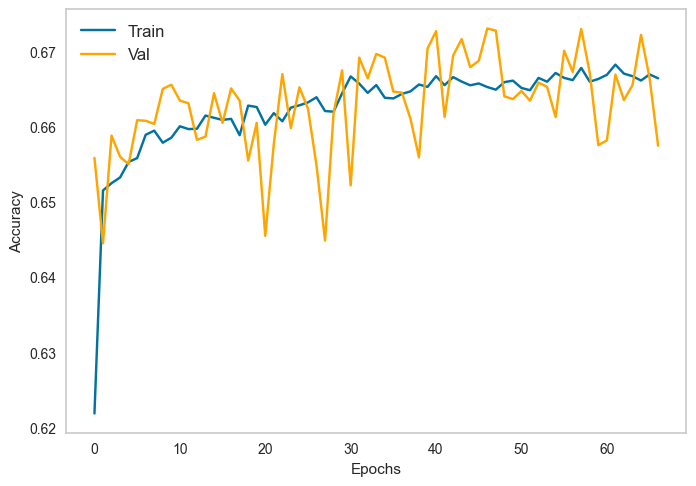

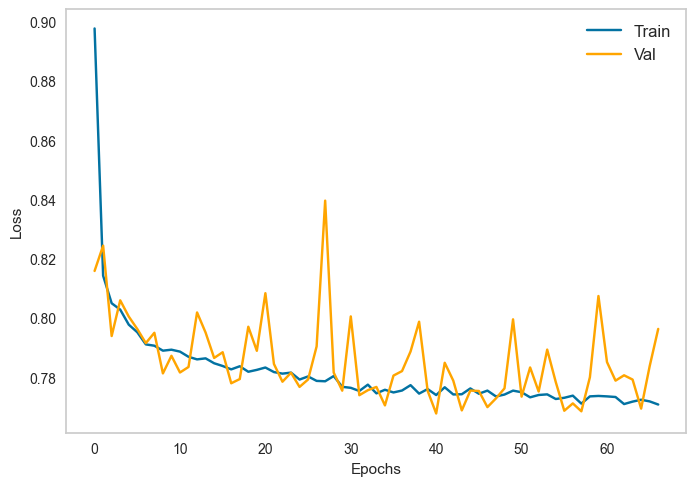

In [91]:
#Con kernel regulizer di 0.005
history_l2 = nn_L2.history_

plt.plot(history_l2['accuracy'], label='Train')
plt.plot(history_l2['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_l2['loss'], label='Train')
plt.plot(history_l2['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()


## Dropout

Il meccanismo di regolarizzazione Dropout è una tecnica utilizzata nelle reti neurali per prevenire l'overfitting. Dropout agisce disattivando casualmente un certo numero di unità (neuroni) nel layer durante la fase di addestramento.

valori tipici per il tasso di Dropout p variano tra 0.2 e 0.5. Un tasso di 0.3, come nell'esempio sopra, è comunemente usato e rappresenta un buon punto di partenza.


In [67]:
from keras.layers import Dropout

In [92]:
n_classes = 4
def build_DROPOUT_model(optimizer__learning_rate):

    n_feature = X_train.shape[1]
    h_dim = 64
    model = Sequential()
    model.add(Dense(h_dim, input_dim=n_feature, activation='tanh')) #questo e quello successivo sono gli hidden layer
    model.add(Dropout(0.3))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model


In [93]:
mc = ModelCheckpoint('Output_Saved/Advanced_Class&Reg/best_model_DROPOUT.keras', monitor='val_accuracy', save_best_only=True)

nn_do = KerasClassifier(build_DROPOUT_model(0.01), callbacks=[es,mc])

/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
nn_do.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=200)

Epoch 1/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5138 - loss: 1.0623 - val_accuracy: 0.6550 - val_loss: 0.7999
Epoch 2/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.6353 - loss: 0.8342 - val_accuracy: 0.6542 - val_loss: 0.7791
Epoch 3/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6438 - loss: 0.8139 - val_accuracy: 0.6589 - val_loss: 0.7702
Epoch 4/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.6483 - loss: 0.7988 - val_accuracy: 0.6487 - val_loss: 0.7812
Epoch 5/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6470 - loss: 0.8069 - val_accuracy: 0.6554 - val_loss: 0.7673
Epoch 6/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.6490 - loss: 0.7930 - val_accuracy: 0.6597 - val_loss: 0.7612
Epoch 7/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.6505 - loss: 0.7905 - val_accuracy: 0.6648 - val_loss: 0.7556
Epoch 8/200
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.6510

KerasClassifier(
	model=<Sequential name=sequential_9, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x299c02f50>, <keras.src.callbacks.model_checkpoint.ModelCheckpoint object at 0x15a7f8790>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [95]:
y_pred_do = nn_do.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_do))
print('F1-score %s' % f1_score(y_test, y_pred_do, average='weighted'))
print(classification_report(y_test, y_pred_do, target_names= mapping))

554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
Accuracy 0.6777144147704817
F1-score 0.6731007033043018
              precision    recall  f1-score   support

       Angry       0.66      0.69      0.68      5986
       Happy       0.66      0.70      0.68      6582
     Relaxed       0.60      0.33      0.43      1439
         Sad       0.75      0.75      0.75      3704

    accuracy                           0.68     17711
   macro avg       0.67      0.62      0.63     17711
weighted avg       0.68      0.68      0.67     17711



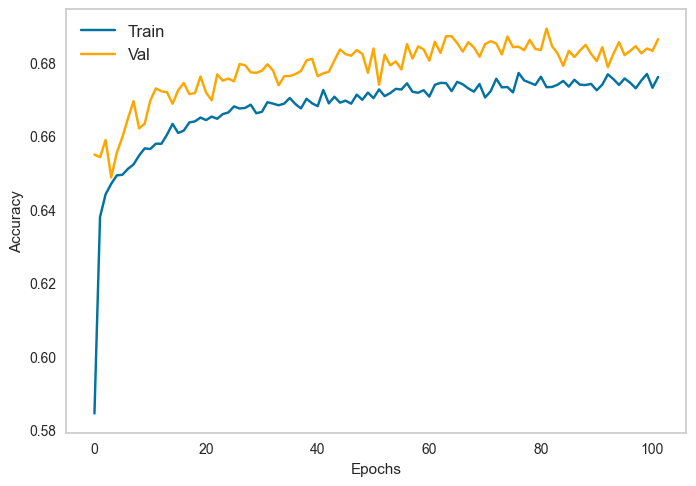

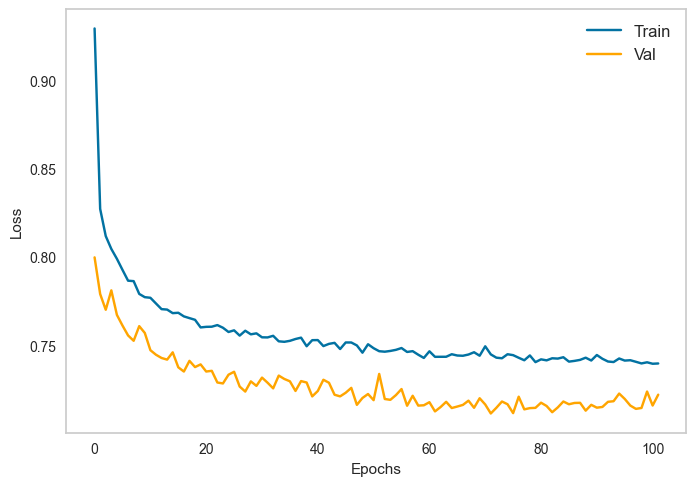

In [96]:
history_do = nn_do.history_

plt.plot(history_do['accuracy'], label='Train')
plt.plot(history_do['val_accuracy'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

plt.plot(history_do['loss'], label='Train')
plt.plot(history_do['val_loss'], label='Val', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.xlim(0,50)
plt.legend(loc='best', fontsize=12)
plt.grid(False)
plt.show()

## Model Comparison

In [114]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('Output_Saved/Advanced_Class&Reg/best_model_NOREG.keras')
best_L2_model = load_model('Output_Saved/Advanced_Class&Reg/best_model_L2.keras')
best_DROPOUT_model = load_model('Output_Saved/Advanced_Class&Reg/best_model_DROPOUT.keras')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 715us/step - accuracy: 0.6839 - loss: 0.7180
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.6614 - loss: 0.7767
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.6821 - loss: 0.7192


In [115]:
print('Early Stopping:')
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('L2:')
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Drop out:')
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Early Stopping:
Loss 0.724068, Accuracy 0.681780
L2:
Loss 0.780292, Accuracy 0.660155
Drop out:
Loss 0.722238, Accuracy 0.682175
